In [215]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


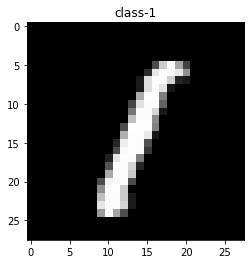

Train image 42881-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  76 204
  253 165  66   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 231 253
  252 233 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  26 222 252 253
  208  37  25   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [216]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'C:/Users/BIDIT/OneDrive/Documents/Machine Learning/Assignment-1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

Train data (X) size: (48000, 28, 28), and labels (Y) size: (48000,)
Validation data (X) size: (12000, 28, 28), and labels (Y) size: (12000,)


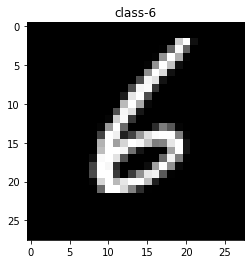

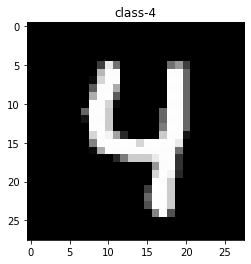

In [217]:
# Your validation set extraction script/code 

# randomised the train dataset and train data labels
temp = list(zip(train_images, train_labels))
np.random.shuffle(temp)
train_images, train_labels = zip(*temp)

train2_image,validation_image = np.split(train_images,[int(0.80 * len(train_images))])
train2_label,validation_label= np.split(train_labels,[int(0.80 * len(train_images))])
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train2_image.shape, train2_label.shape))
print('Validation data (X) size: {}, and labels (Y) size: {}' .format(validation_image.shape, validation_label.shape))


#showing the training dataset and the training label 
plt.title('class-'+str(train2_label[7000]))
plt.imshow(train2_image[7000], cmap = 'gray')
plt.show()


# showing the validation dataset and the validation label
plt.title('class-'+str(validation_label[10]))
plt.imshow(validation_image[10], cmap = 'gray')
plt.show()

In [218]:
train2_image= np.array(train2_image.reshape(-1, 28 * 28))
train2_image = train2_image.astype(np.float32) / 255.0
validation_image=np.array(validation_image.reshape(-1,28*28))
validation_image= validation_image.astype(np.float32) / 255.0
print(train2_image.shape)
print(validation_image.shape)

(48000, 784)
(12000, 784)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [219]:
def distance(x, y, p):
    if p == 1:
        return np.sum(np.abs(x - y))
    elif p == 2:
        return np.sqrt(np.sum((x - y)**2))
    else:
        return np.max(np.abs(x - y))

In [220]:
# Your k-NN algorithm script/code 

def knn(train_images, train_labels, test_image, k, p):
    distances = distance(train_images,test_image,p)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_neighbors]
    counts = np.bincount(nearest_labels)
    return np.argmax(counts)

def test_knn(train_images, train_labels, test_images, test_labels, k, p):
    correct = 0
    for i in range(len(test_images)):
        predicted_label = knn(train_images, train_labels, test_images[i], k, p)
        if predicted_label == test_labels[i]:
            correct += 1
    accuracy = float(correct) / len(test_images)
    print("Accuracy: %.2f%% for p=%d" % (accuracy * 100, p))




In [227]:
#for euclidean distance
%time
for k in range(1, 21):
    print("K = %d:" % k)
    test_knn(train2_image, train2_label, validation_image, validation_label, k,2)

CPU times: total: 0 ns
Wall time: 0 ns
K = 1:
Accuracy: 9.17% for p=2
K = 2:
Accuracy: 9.17% for p=2
K = 3:
Accuracy: 9.17% for p=2
K = 4:
Accuracy: 9.17% for p=2
K = 5:


KeyboardInterrupt: 

In [ ]:
#for manhattan distance
%time
for k in range(1, 21):
    print("K = %d:" % k)
    test_knn(train2_image, train2_label, validation_image, validation_label, k,1)

In [ ]:
#for chebyshevs distance
%time
for k in range(1, 21):
    print("K = %d:" % k)
    test_knn(train2_image, train2_label, validation_image, validation_label, k,4)

In [226]:
%time
for k in range(1, 25):
    for p in range(1, 3):
        print("K = %d, P = %d:" % (k, p))
        test_knn(train2_image, train2_label, validation_image, validation_label, k, p)


K = 1, P = 1:


KeyboardInterrupt: 

In [ ]:
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true) * 100

# Compute accuracy as a function of k for fixed p
p = 2
ks = np.arange(1, 22, 2)
accs = [accuracy(knn(train2_image, train2_label, validation_image, k=k, p=p), validation_label) for k in ks]

plt.plot(ks, accs)
plt.title(f"Accuracy vs k for p={p}")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# compute accuracy for varying values of k and p
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
ps = [1, 2, 3]

accuracies = np.array([[accuracy(knn(train2_image, train2_label, validation_image, k=k, p=p), validation_label) for p in ps] for k in ks])

# plot the accuracy as a function of k and p
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j, p in enumerate(ps):
    ax.plot(ks, [p] * len(ks), accuracies[:, j], label='p={}'.format(p))
ax.set_xlabel('k')
ax.set_ylabel('p')
ax.set_zlabel('Accuracy (%)')
plt.legend()
plt.show()